# 1) Machine Leaning (RFR, KNN)

## 1.1) Import the necessary libraries and the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [3]:
# Import csv files for the 3 cities
dfa = pd.read_csv('A45_Addis.csv')
dfj = pd.read_csv('A45_Jburg.csv')
dfl = pd.read_csv('A45_Lagos.csv')

In [10]:
# Make a tuple of list of data frames 
dfs = [dfa, dfj, dfl]

In [12]:
len(dfs)

3

In [14]:
for df in dfs:
    print(df.head(2))

   OBJECTID          AREA    LST_mean         City  Year  Imperviousness  \
0        -1  2.895939e+08  303.399078  Addis Ababa  2000               0   
1        -1  6.852724e+05  303.822571  Addis Ababa  2000               1   

   UHI_mean   NDVI_mean    Elev_mean  Slope_mean  Aspect_mean  prcp_mean  \
0 -0.858326  438.182587  2411.539062    5.959319   177.286224  90.544517   
1  0.274194  432.177429  2384.403320    6.209677   190.693543  92.880951   

               date  
0  1/1/2000 0:00:00  
1  1/1/2000 0:00:00  
   OBJECTID          AREA    LST_mean          City  Year  Imperviousness  \
0        -1  1.149067e+09  304.928986  Johannesburg  2000               0   
1        -1  1.019126e+07  304.879822  Johannesburg  2000               1   

   UHI_mean   NDVI_mean    Elev_mean  Slope_mean  Aspect_mean  prcp_mean  \
0  0.314984  367.203949  1579.567383    2.965492   173.949875  72.322800   
1  0.187865  364.603912  1604.158447    3.168409   175.041809  73.899139   

               

## 1.2) Organize the data

### Rename columnd names

In [18]:
for df in dfs:
    #df.rename(columns={'OBJECTID': 'oid'}, inplace=True)
    df.rename(columns={'AREA': 'area'}, inplace=True)
    df.rename(columns={'LST_mean': 'lst'}, inplace=True)
    df.rename(columns={'City': 'city'}, inplace=True)
    df.rename(columns={'Imperviousness': 'imp'}, inplace=True)
    df.rename(columns={'NDVI_mean': 'ndvi'}, inplace=True)
    df.rename(columns={'Elev_mean': 'elev'}, inplace=True)
    df.rename(columns={'Slope_mean': 'slope'}, inplace=True)
    df.rename(columns={'Aspect_mean': 'aspect'}, inplace=True)
    df.rename(columns={'prcp_mean': 'precip'}, inplace=True)
    df.rename(columns={'Slope_mean': 'slope'}, inplace=True)
    df.rename(columns={'Year': 'year'}, inplace=True)
    df.rename(columns={'UHI_mean': 'uhi'}, inplace=True)

In [20]:
for df in dfs:
    print(df.head(2))

   OBJECTID          area         lst         city  year  imp       uhi  \
0        -1  2.895939e+08  303.399078  Addis Ababa  2000    0 -0.858326   
1        -1  6.852724e+05  303.822571  Addis Ababa  2000    1  0.274194   

         ndvi         elev     slope      aspect     precip              date  
0  438.182587  2411.539062  5.959319  177.286224  90.544517  1/1/2000 0:00:00  
1  432.177429  2384.403320  6.209677  190.693543  92.880951  1/1/2000 0:00:00  
   OBJECTID          area         lst          city  year  imp       uhi  \
0        -1  1.149067e+09  304.928986  Johannesburg  2000    0  0.314984   
1        -1  1.019126e+07  304.879822  Johannesburg  2000    1  0.187865   

         ndvi         elev     slope      aspect     precip              date  
0  367.203949  1579.567383  2.965492  173.949875  72.322800  1/1/2000 0:00:00  
1  364.603912  1604.158447  3.168409  175.041809  73.899139  1/1/2000 0:00:00  
   OBJECTID          area         lst   city  year  imp       uhi

### Save data for Deep Learning at later stage

In [23]:
dfs2 = dfs

### Drop unimportant fields

In [26]:
for df in dfs:
    df.drop(['OBJECTID'], axis = 1, inplace = True)
    print(df.head(2))

           area         lst         city  year  imp       uhi        ndvi  \
0  2.895939e+08  303.399078  Addis Ababa  2000    0 -0.858326  438.182587   
1  6.852724e+05  303.822571  Addis Ababa  2000    1  0.274194  432.177429   

          elev     slope      aspect     precip              date  
0  2411.539062  5.959319  177.286224  90.544517  1/1/2000 0:00:00  
1  2384.403320  6.209677  190.693543  92.880951  1/1/2000 0:00:00  
           area         lst          city  year  imp       uhi        ndvi  \
0  1.149067e+09  304.928986  Johannesburg  2000    0  0.314984  367.203949   
1  1.019126e+07  304.879822  Johannesburg  2000    1  0.187865  364.603912   

          elev     slope      aspect     precip              date  
0  1579.567383  2.965492  173.949875  72.322800  1/1/2000 0:00:00  
1  1604.158447  3.168409  175.041809  73.899139  1/1/2000 0:00:00  
           area         lst   city  year  imp       uhi        ndvi  \
0  1.055166e+09  305.230102  Lagos  2000    0 -2.29526

## 1.3) Remove Outlier 

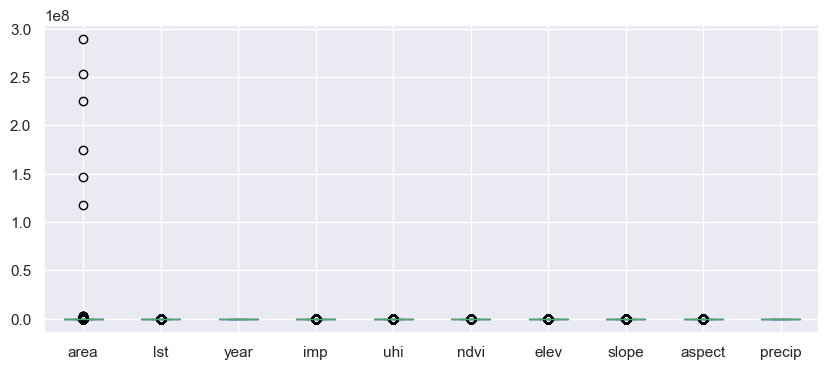

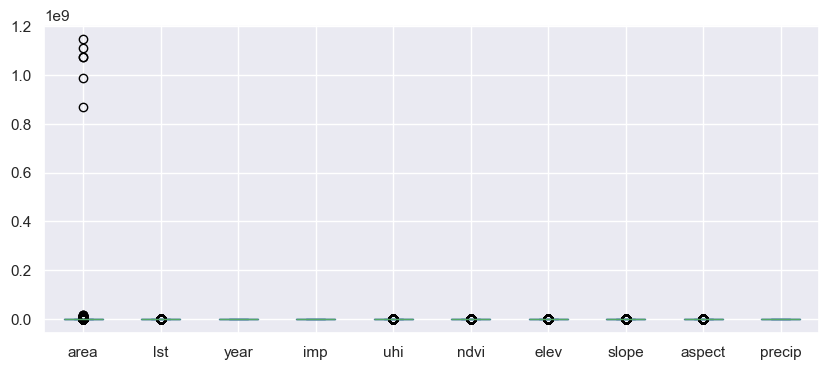

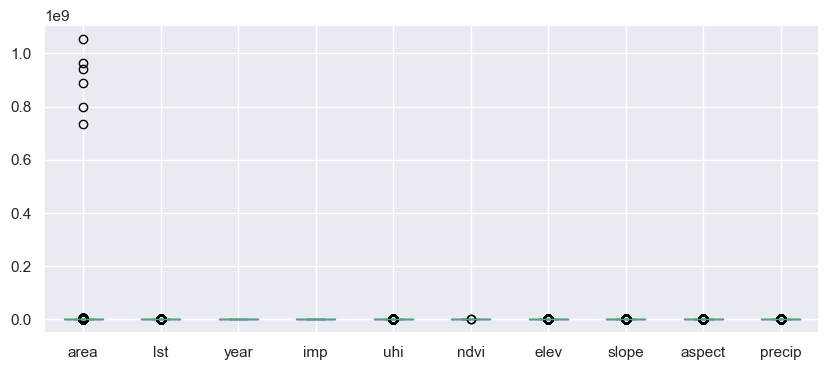

In [29]:
for df in dfs:
    df.plot(kind = 'box', figsize = (10, 4))

In [30]:
# Function to remove outliers using Z-score method for specific columns
def remove_outliers_z_score(df, columns, threshold=3):
    """
    Remove outliers using Z-score method for specific columns in a DataFrame.

    Parameters:
    - df: Pandas DataFrame
    - columns: List of column names to consider for outlier removal
    - threshold: Z-score threshold for outlier detection (default is 3)

    Returns:
    - DataFrame without outliers
    """
    # Calculate Z-scores for specified columns
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    
    # Filter rows where any Z-score is greater than threshold
    filtered_df = df[(z_scores < threshold).all(axis=1)]
    
    return filtered_df

In [31]:
dfs1 = []
for df in dfs:
    df1 =  remove_outliers_z_score(df, ['area', 'lst', 'imp', 'uhi', 'ndvi', 'elev', 'slope', 'aspect','precip'])
    dfs1.append(df1)

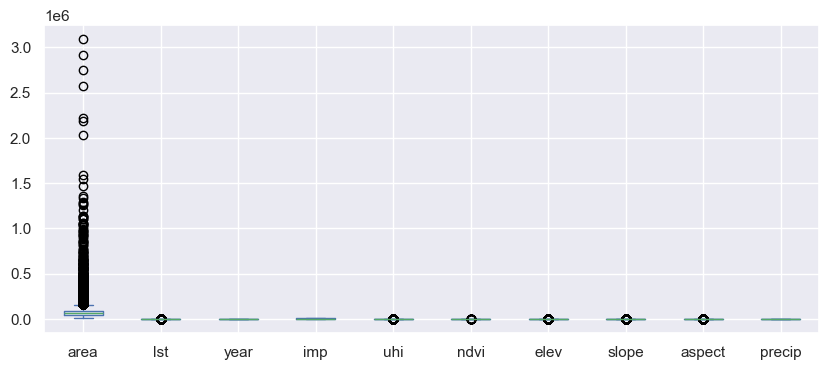

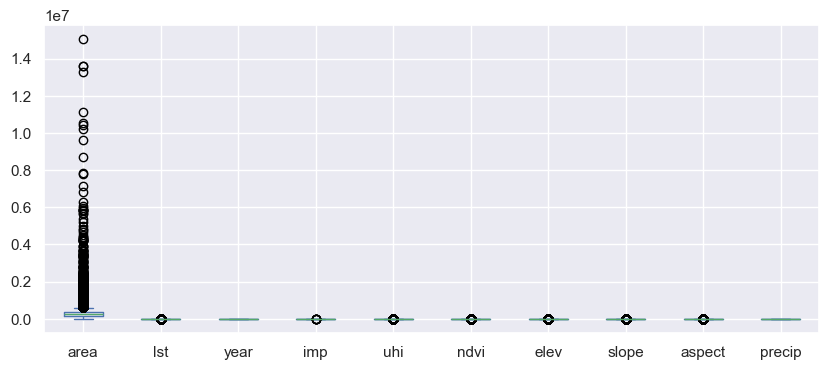

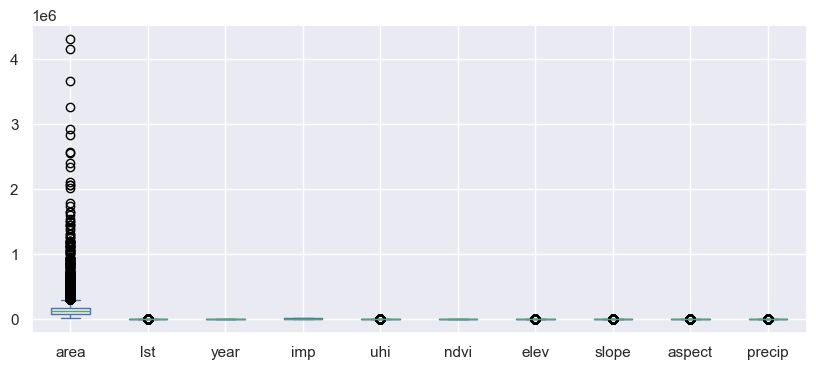

In [35]:
for df in dfs1:
    df.plot(kind = 'box', figsize = (10, 4))

In [37]:
dfs1[0].head()

,area,lst,city,year,imp,uhi,ndvi,elev,slope,aspect,precip,date
1,685272.359641,303.822571,Addis Ababa,2000,1,0.274194,432.177429,2384.403320,6.209677,190.693543,92.880951,1/1/2000 0:00:00
2,563691.779705,304.901947,Addis Ababa,2000,2,3.117647,430.529419,2379.431397,6.568627,167.823532,92.024391,1/1/2000 0:00:00
3,375794.519803,303.323517,Addis Ababa,2000,3,-1.235294,471.264709,2381.000000,5.705883,199.852936,93.409088,1/1/2000 0:00:00
4,287372.279849,302.846161,Addis Ababa,2000,4,-1.923077,430.692322,2383.269287,6.538462,184.730774,90.300003,1/1/2000 0:00:00
5,342636.179820,303.774200,Addis Ababa,2000,5,0.258064,410.000000,2365.000000,5.838710,154.580643,93.444443,1/1/2000 0:00:00


## 1.4) Visualize  (UHI as a dependent variable), only for Johannesburg (dfs1[1])

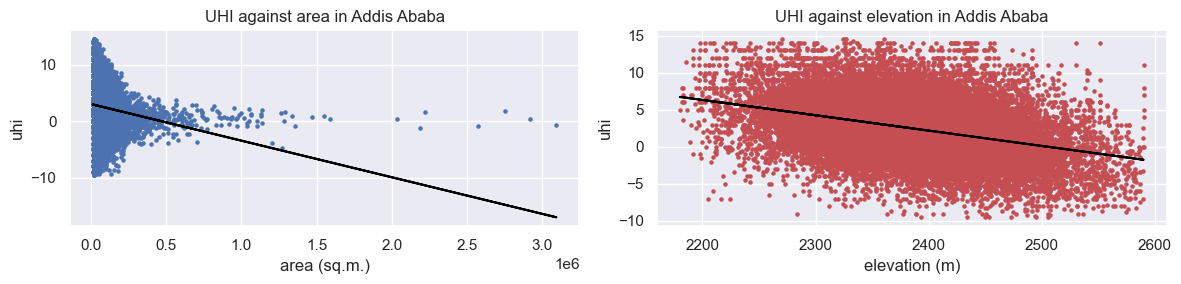

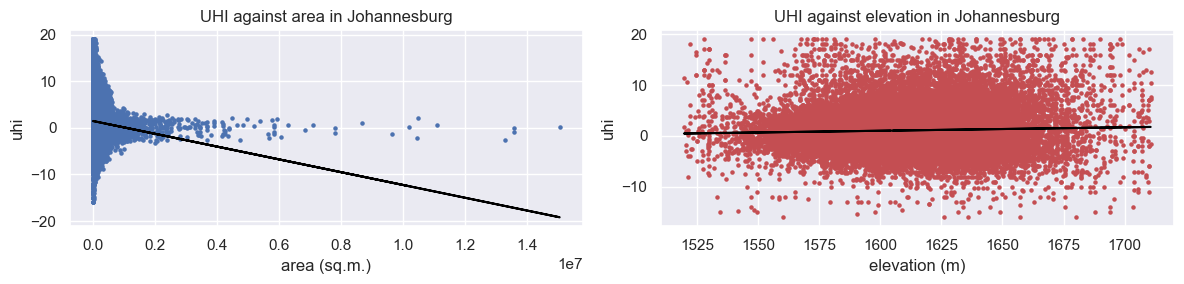

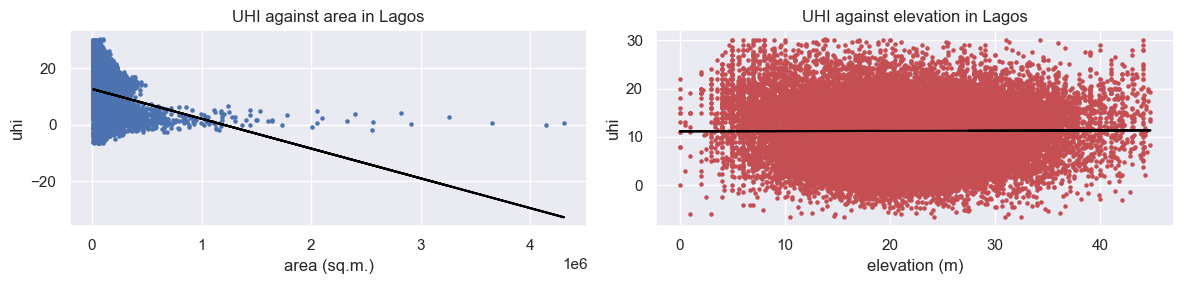

In [40]:
for df in dfs1:
    city = df['city'].iat[0]
    # Create 2 subplot, 1 for each variable
    fig, axes = plt.subplots(figsize=(12,3),nrows=1,ncols=2)

    # Plot for date vs temp
    axes[0].scatter(df['area'],df['uhi'],color="b", s = 5)
    axes[0].set_xlabel("area (sq.m.)")
    axes[0].set_ylabel("uhi")
    axes[0].set_title("UHI against area"+ " in " + city)

    # Plot for bedrooms vs house prices
    axes[1].scatter(df['elev'],df['uhi'],color="r", s = 5)
    axes[1].set_xlabel("elevation (m)")
    axes[1].set_ylabel("uhi")
    axes[1].set_title("UHI against elevation"+ " in " + city)

    # Calculate the trend line
    z0 = np.polyfit(df['area'], df['uhi'], 1)  # 1 for linear regression
    p0 = np.poly1d(z0)
    z1 = np.polyfit(df['elev'], df['uhi'], 1)  # 1 for linear regression
    p1 = np.poly1d(z1)

    # Plot the trend line
    axes[0].plot(df['area'], p0(df['area']), color='black', label='Trend line')
    axes[1].plot(df['elev'], p1(df['elev']), color='black', label='Trend line')

    # Enhance layout
    plt.tight_layout()
    plt.savefig("uhi against area and elevation"+ " in " + city, dpi=300)  # Save the scatter plot

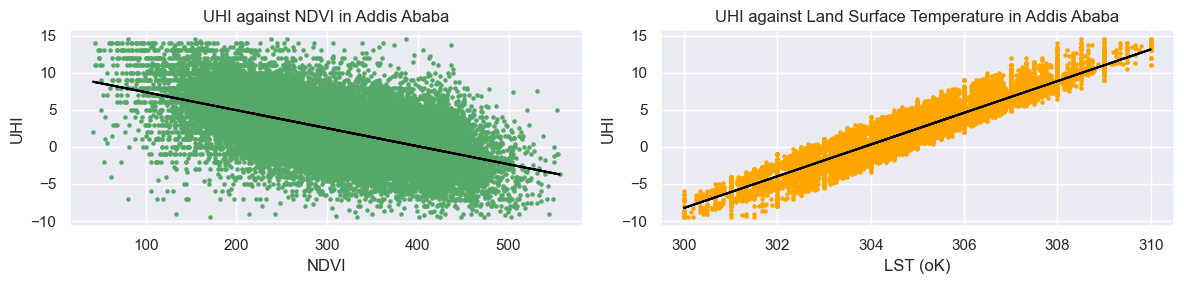

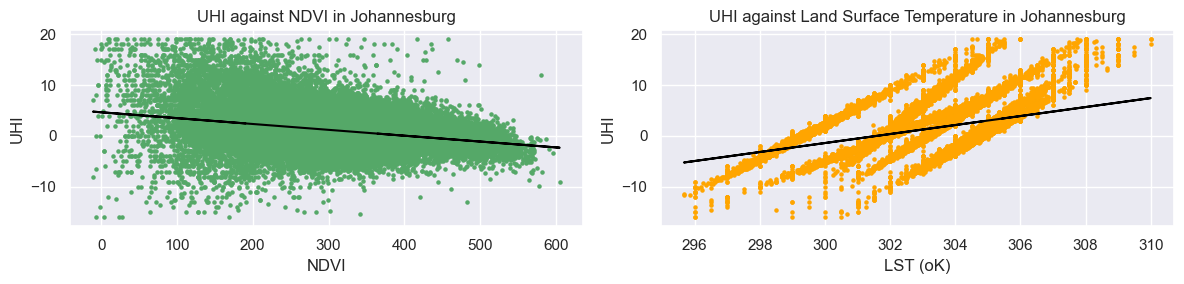

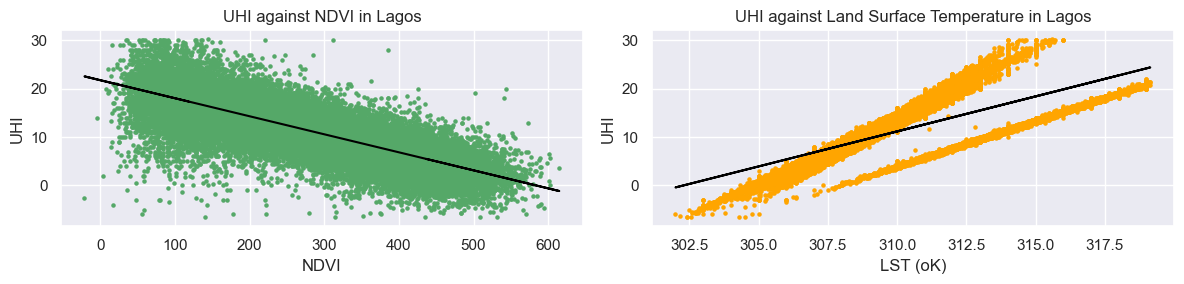

In [41]:
for df in dfs1:
    city = df['city'].iat[0]
    # Create 2 subplot, 1 for each variable
    fig, axes = plt.subplots(figsize=(12,3),nrows=1,ncols=2)

    # Plot for date vs temp
    axes[0].scatter(df['ndvi'],df['uhi'],color="g", s = 5)
    axes[0].set_xlabel("NDVI")
    axes[0].set_ylabel("UHI")
    axes[0].set_title("UHI against NDVI"+ " in " + city)

    # Plot for bedrooms vs house prices
    axes[1].scatter(df['lst'],df['uhi'],color="orange", s = 5)
    axes[1].set_xlabel("LST (oK)")
    axes[1].set_ylabel("UHI")
    axes[1].set_title("UHI against Land Surface Temperature"+ " in " + city)

    # Calculate the trend line
    z0 = np.polyfit(df['ndvi'], df['uhi'], 1)  # 1 for linear regression
    p0 = np.poly1d(z0)
    z1 = np.polyfit(df['lst'], df['uhi'], 1)  # 1 for linear regression
    p1 = np.poly1d(z1)

    # Plot the trend line
    axes[0].plot(df['ndvi'], p0(df['ndvi']), color='black', label='Trend line')
    axes[1].plot(df['lst'], p1(df['lst']), color='black', label='Trend line')

    # Enhance layout
    plt.tight_layout()
    plt.savefig("uhi against NDVI and LST" + " in " + city, dpi=300)  # Save the scatter plot

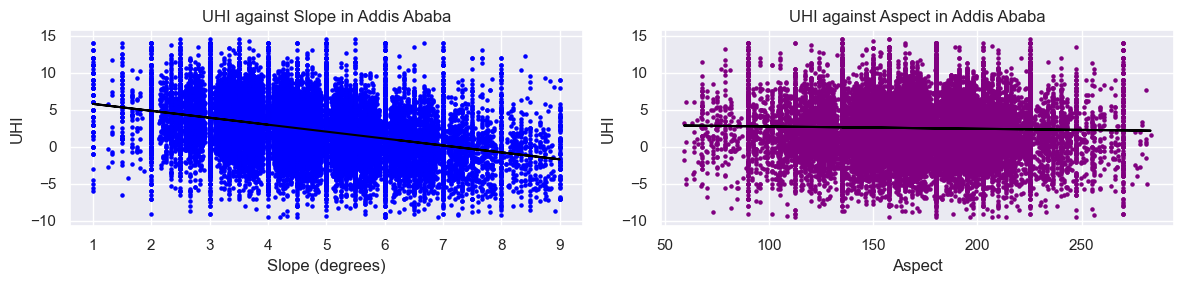

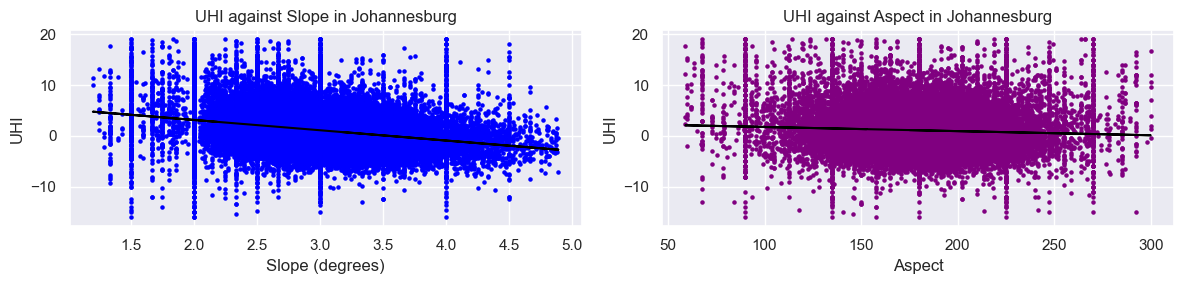

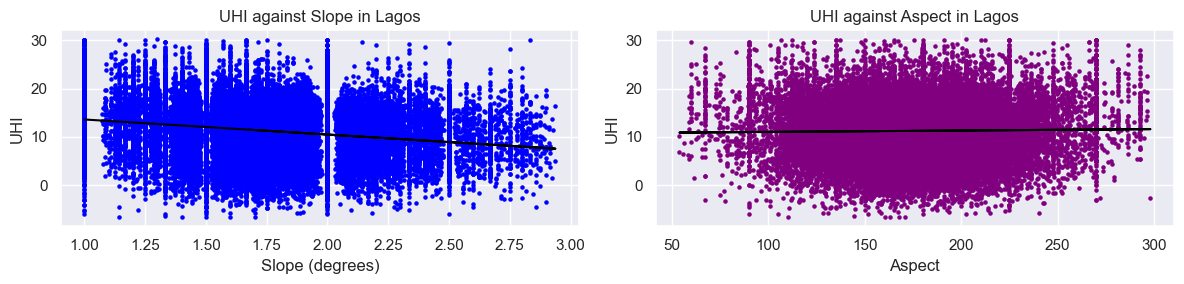

In [42]:
for df in dfs1:
    city = df['city'].iat[0]
    # Create 2 subplot, 1 for each variable
    fig, axes = plt.subplots(figsize=(12,3),nrows=1,ncols=2)

    # Plot for date vs temp
    axes[0].scatter(df['slope'],df['uhi'],color="blue", s = 5)
    axes[0].set_xlabel("Slope (degrees)")
    axes[0].set_ylabel("UHI")
    axes[0].set_title("UHI against Slope"+ " in " + city)
    #plt.savefig("uhi agains against area", dpi=300)  # Save the scatter plot

    # Plot for bedrooms vs house prices
    axes[1].scatter(df['aspect'],df['uhi'],color="purple", s = 5)
    axes[1].set_xlabel("Aspect")
    axes[1].set_ylabel("UHI")
    axes[1].set_title("UHI against Aspect"+ " in " + city)

    # Calculate the trend line
    z0 = np.polyfit(df['slope'], df['uhi'], 1)  # 1 for linear regression
    p0 = np.poly1d(z0)
    z1 = np.polyfit(df['aspect'], df['uhi'], 1)  # 1 for linear regression
    p1 = np.poly1d(z1)

    # Plot the trend line
    axes[0].plot(df['slope'], p0(df['slope']), color='black', label='Trend line')
    axes[1].plot(df['aspect'], p1(df['aspect']), color='black', label='Trend line')

    # Enhance layout
    plt.tight_layout()
    plt.savefig("uhi against slope and aspect" + " in " + city, dpi=300)  # Save the scatter plot

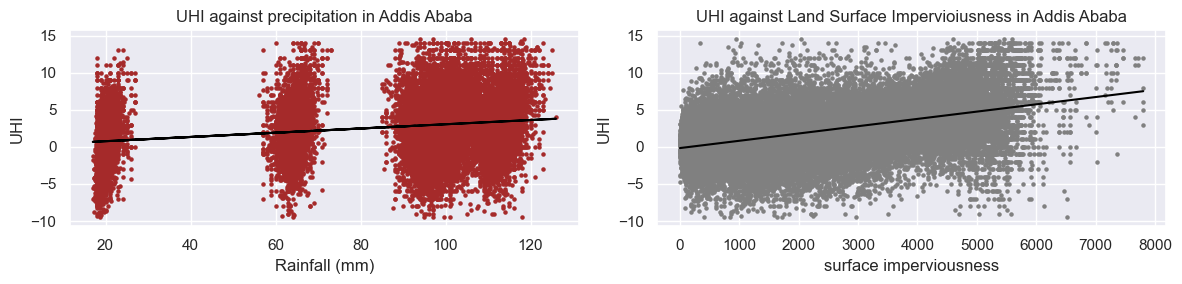

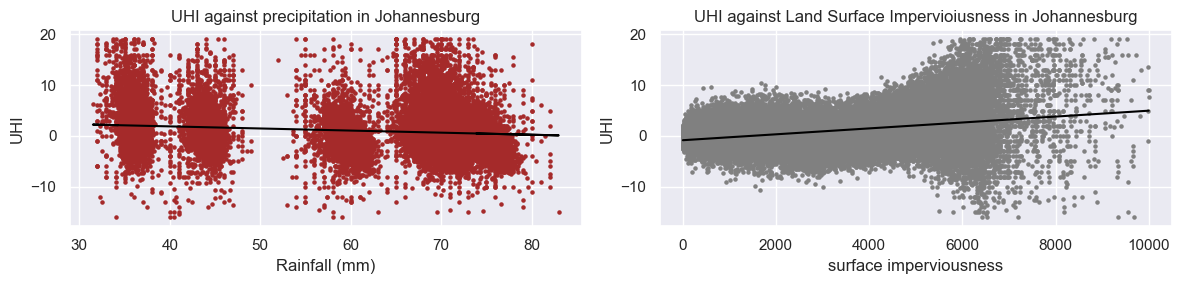

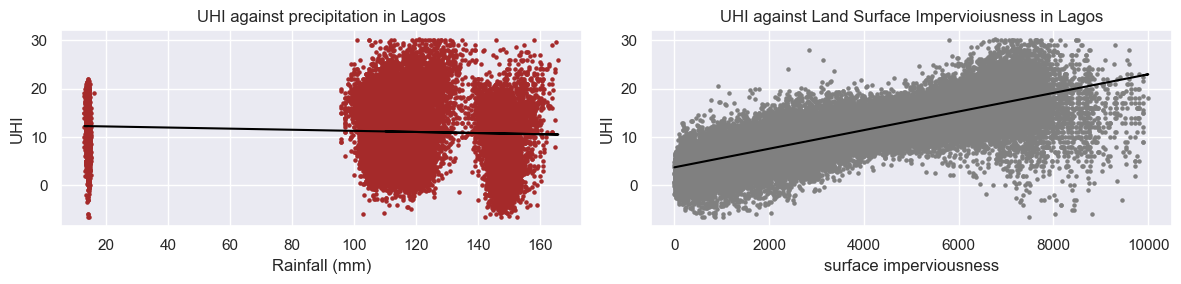

In [43]:
for df in dfs1:
    city = df['city'].iat[0]
    # Create 2 subplot, 1 for each variable
    fig, axes = plt.subplots(figsize=(12,3),nrows=1,ncols=2)
    
    # Plot for date vs temp
    axes[0].scatter(df['precip'],df['uhi'],color="brown", s = 5)
    axes[0].set_xlabel("Rainfall (mm)")
    axes[0].set_ylabel("UHI")
    axes[0].set_title("UHI against precipitation"+ " in " + city)
    
    #plt.savefig("uhi agains against area", dpi=300)  # Save the scatter plot
    # Plot for bedrooms vs house prices
    axes[1].scatter(df['imp'],df['uhi'],color="gray", s = 5)
    axes[1].set_xlabel("surface imperviousness")
    axes[1].set_ylabel("UHI")
    axes[1].set_title("UHI against Land Surface Impervioiusness"+ " in " + city)

    # Calculate the trend line
    z0 = np.polyfit(df['precip'], df['uhi'], 1)  # 1 for linear regression
    p0 = np.poly1d(z0)
    z1 = np.polyfit(df['imp'], df['uhi'], 1)  # 1 for linear regression
    p1 = np.poly1d(z1)

    # Plot the trend line
    axes[0].plot(df['precip'], p0(df['precip']), color='black', label='Trend line')
    axes[1].plot(df['imp'], p1(df['imp']), color='black', label='Trend line')
    
    # Enhance layout
    plt.tight_layout()
    plt.savefig("uhi against precipitation and imperviousness" + " in " + city, dpi=300)  # Save the scatter plot

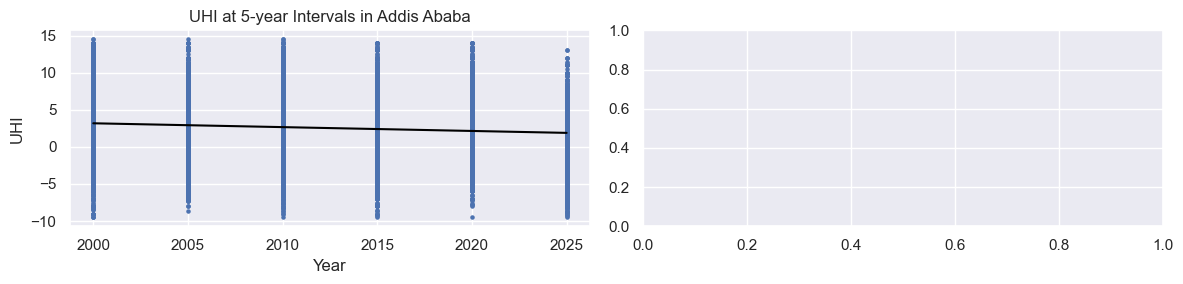

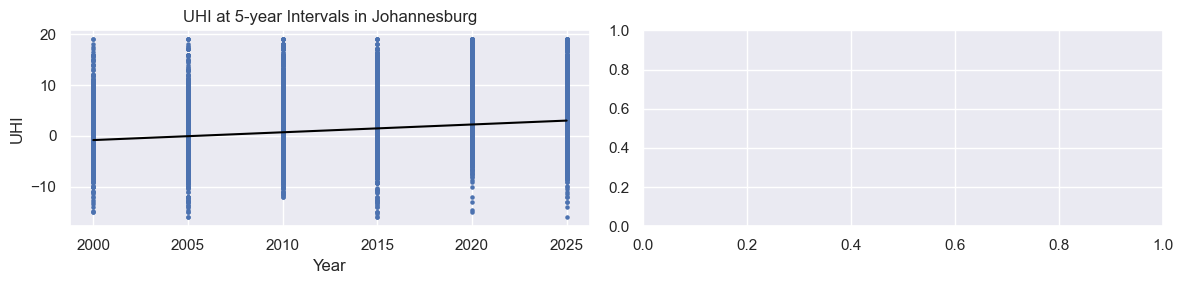

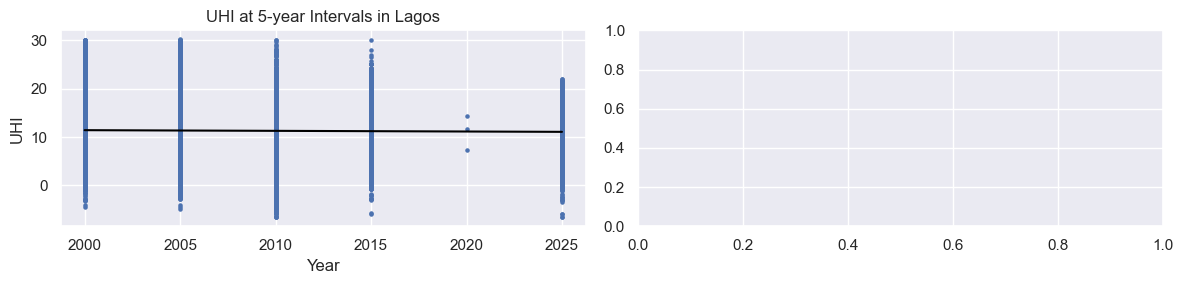

In [44]:
for df in dfs1:
    city = df['city'].iat[0]
    # Create 2 subplot, 1 for each variable
    fig, axes = plt.subplots(figsize=(12,3),nrows=1,ncols=2)

    # Plot for date vs temp
    axes[0].scatter(df['year'],df['uhi'],color="b", s = 5)
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("UHI")
    axes[0].set_title("UHI at 5-year Intervals"+ " in " + city)
    #plt.savefig("uhi agains against area", dpi=300)  # Save the scatter plot

    # Calculate the trend line
    z0 = np.polyfit(df['year'], df['uhi'], 1)  # 1 for linear regression
    p0 = np.poly1d(z0)

    # Plot the trend line
    axes[0].plot(df['year'], p0(df['year']), color='black', label='Trend line')

    # Enhance layout
    plt.tight_layout()
    plt.savefig("uhi against year" + " in " + city, dpi=300)  # Save the scatter plot

# 2) Make heat maps of the variables for Pearson correlation matrix

## 2.1) Prepare data for correlation matrix

Reorder the columns to make UHI the last column, because it is the dependent variable.

In [49]:
addis = dfs1[0]
jburg = dfs1[1]
lagos = dfs1[2]
lagos.head()

,area,lst,city,year,imp,uhi,ndvi,elev,slope,aspect,precip,date
1,3.257120e+06,306.749237,Lagos,2000,1,2.631579,436.919495,18.481596,1.676923,173.772308,110.226417,1/1/2000 0:00:00
2,2.399983e+06,307.084045,Lagos,2000,2,3.773109,437.794128,17.248962,1.717842,180.248962,111.309013,1/1/2000 0:00:00
3,1.774777e+06,307.034088,Lagos,2000,3,3.568182,437.897736,17.604519,1.670454,177.937500,111.786125,1/1/2000 0:00:00
4,1.442007e+06,306.972015,Lagos,2000,4,3.370629,423.314697,17.853147,1.664336,169.552445,111.204224,1/1/2000 0:00:00
5,1.179824e+06,307.153839,Lagos,2000,5,4.162393,419.777771,18.975000,1.781513,168.100845,111.852173,1/1/2000 0:00:00


In [157]:
addis1 = addis.drop(['city', 'year', 'date'], axis = 1)
jburg1 = jburg.drop(['city', 'year', 'date'], axis = 1)
lagos1 = lagos.drop(['city', 'year', 'date'], axis = 1)
cities = [addis1, jburg1, lagos1]
cities[0].head()

,area,lst,imp,uhi,ndvi,elev,slope,aspect,precip
1,685272.359641,303.822571,1,0.274194,432.177429,2384.403320,6.209677,190.693543,92.880951
2,563691.779705,304.901947,2,3.117647,430.529419,2379.431397,6.568627,167.823532,92.024391
3,375794.519803,303.323517,3,-1.235294,471.264709,2381.000000,5.705883,199.852936,93.409088
4,287372.279849,302.846161,4,-1.923077,430.692322,2383.269287,6.538462,184.730774,90.300003
5,342636.179820,303.774200,5,0.258064,410.000000,2365.000000,5.838710,154.580643,93.444443


## 2.2) Make heat maps for Pearson correlation matrix

### Correlation matrix for Addis Ababa

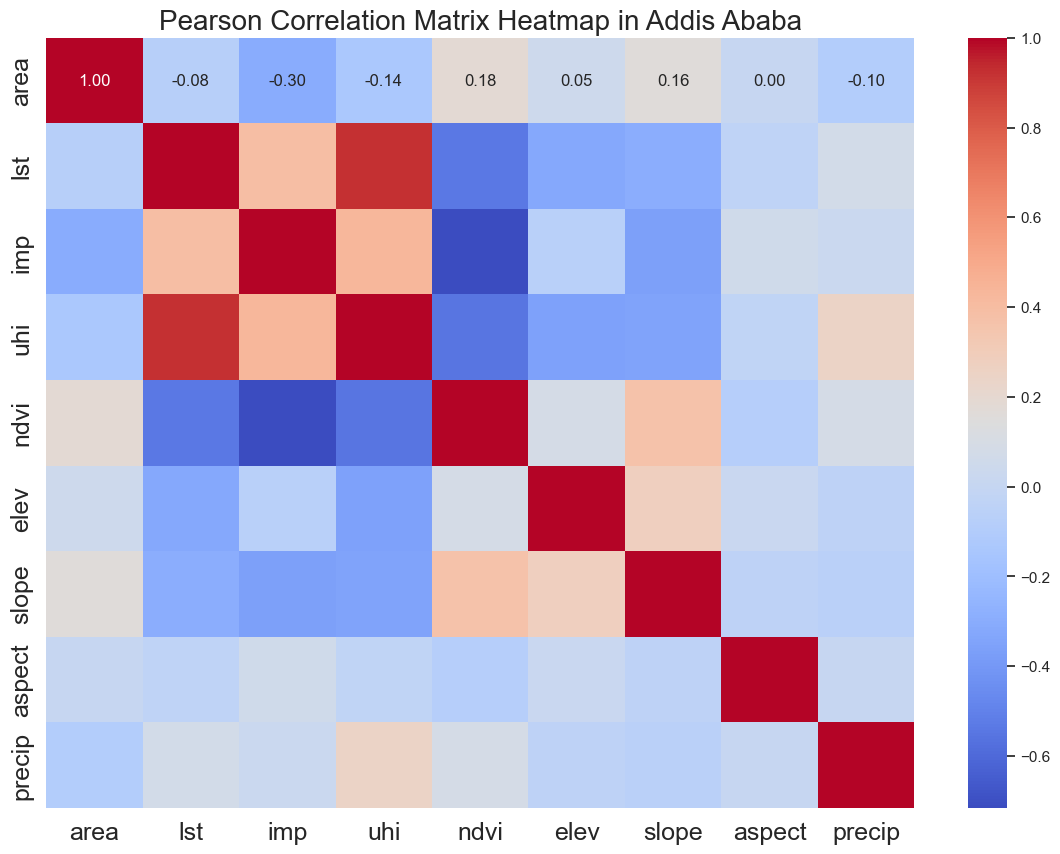

In [187]:
# Calculate the correlation matrix
correlation_matrix_a = addis1.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_a, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap in Addis Ababa', fontsize = 20)
# Adjusting the font size of the variable names (x and y axis labels)
plt.xticks(fontsize=18)  # Adjust the font size for x axis ticks
plt.yticks(fontsize=18)  # Adjust the font size for y axis ticks
plt.savefig("Pearson Correlation matrix of the variables" + " in Addis Ababa", dpi = 400)
plt.show()

### Correlation matrix for Jburg

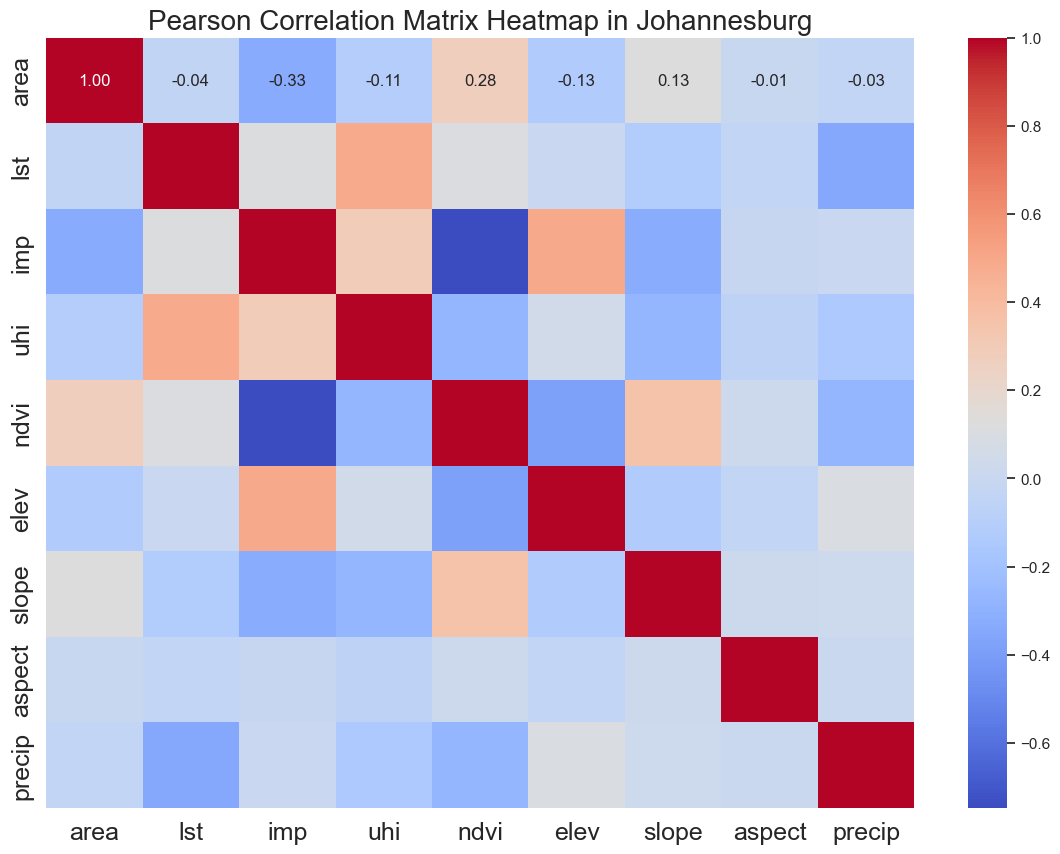

In [189]:
# Calculate the correlation matrix
correlation_matrix_j = jburg1.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_j, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap in Johannesburg', fontsize = 20)
# Adjusting the font size of the variable names (x and y axis labels)
plt.xticks(fontsize=18)  # Adjust the font size for x axis ticks
plt.yticks(fontsize=18)  # Adjust the font size for y axis ticks
plt.savefig("Pearson Correlation matrix of the variables" + " in Johannesburg", dpi = 400)
plt.show()

### Correlation matrix for Lagos

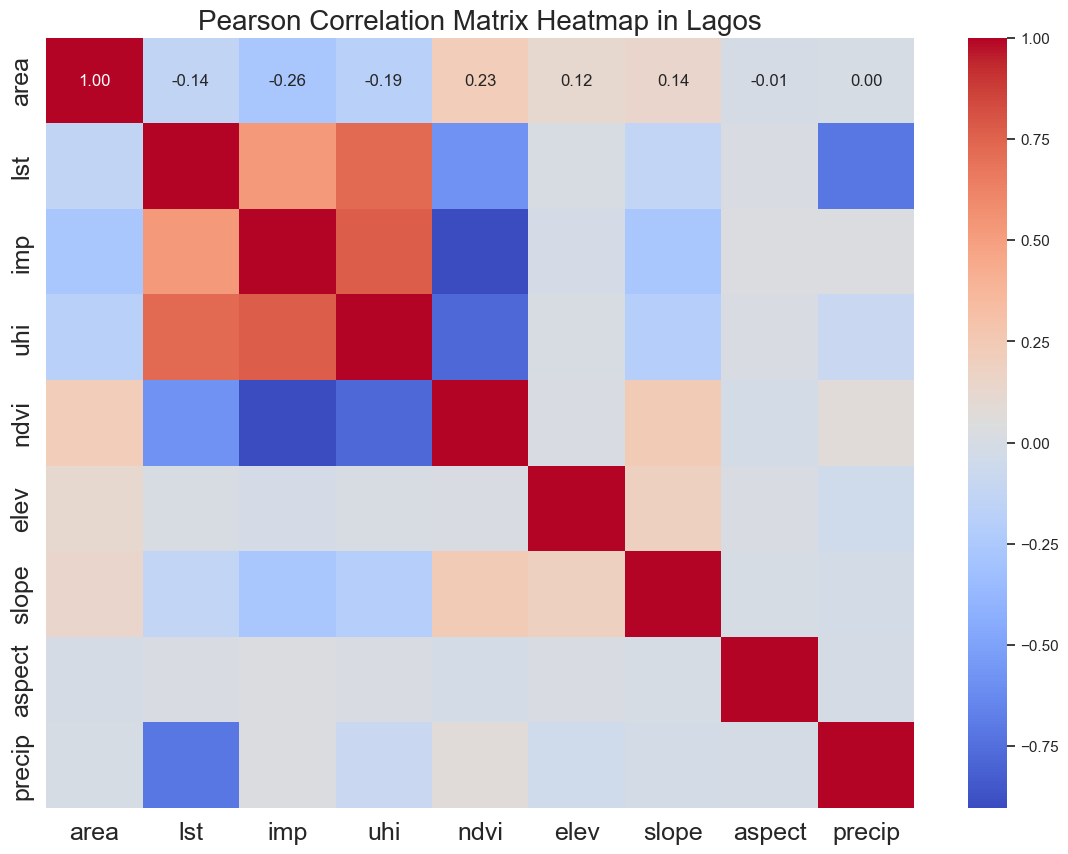

In [191]:
# Calculate the correlation matrix
correlation_matrix_l = lagos1.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_l, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap in Lagos', fontsize = 20)
# Adjusting the font size of the variable names (x and y axis labels)
plt.xticks(fontsize=18)  # Adjust the font size for x axis ticks
plt.yticks(fontsize=18)  # Adjust the font size for y axis ticks
plt.savefig("Pearson Correlation matrix of the variables" + " in Lagos", dpi = 400)
plt.show()

# 3) Run Machine Learning Algorithms

## 3.1) Normalize the Features and make a cost function

In [66]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalized X values,
    the mean and standard deviation of each feature
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    X_norm = (X - mean)/std
    return X_norm , mean , std

In [67]:
def cost_function(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m = len(y)
    pred = X.dot(theta) #computes the predicted output values 'pred' using the input data X and the model parameters theta.
    square_err = (pred - y)**2 #calculates the squared error between the predicted output values and the actual output values y for each training example
    return 1/(2*m) * np.sum(square_err)

## 3.2) Normalize features and Initialize theta

In [70]:
# Convert the dataFrame to numpy array
df12 = addis1.values

# Define the number of samples
m = len(df12[:, -1])

# Extract features and target column
X = df12[:, 0:4]
y = df12[:, -1].reshape(m, 1)

# Normalize the feature
X, mean_X2, std_X2 = featureNormalization(X)

# Add bias term (column of ones)
X = np.append(np.ones((m, 1)), X, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize theta
theta = np.zeros((X_train.shape[1], 1))  # Now it's (5, 1) because we added a bias term

# Display shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Initial theta shape:", theta.shape)

X_train shape: (25113, 5)
X_test shape: (6279, 5)
y_train shape: (25113, 1)
y_test shape: (6279, 1)
Initial theta shape: (5, 1)


### Define gradient descent

In [72]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha

    return theta and the list of the cost of theta during each iteration
    """
    m=len(y)
    J=[]
    for i in range(num_iters):
        pred = X.dot(theta)
        error = np.dot(X.transpose(),(pred -y))
        descent=alpha * 1/m * error
        theta= theta-descent
        J.append(cost_function(X,y,theta))
    return theta, J

### Make cost function

h(x) =82.0663 + -0.4532*x1 + 6.827*x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

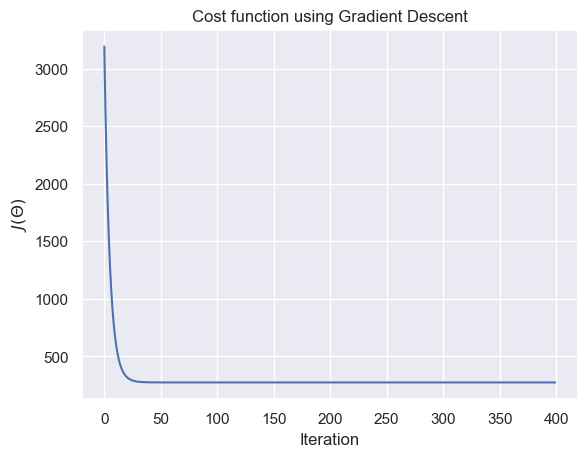

In [75]:
theta, J = gradientDescent(X_test, y_test, theta, 0.1, 400)
print("h(x) ="+str(round(theta[0,0],4))+" + "+str(round(theta[1,0],4))+"*x1 + "+str(round(theta[2,0],4))+"*x2")

plt.plot(J)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

## 3.3) Make regularization and prediction

### Radom Forest

In [83]:
for df in cities:
    # Split the data into features (X) and target (y)
    X = df.drop('uhi', axis=1)
    y = df['uhi']

    # Fit the model
    rf = RandomForestRegressor()
    rf.fit(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse_rf = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error random forest regressor is: {mse_rf}")

    # Get the feature importances
    importances = rf.feature_importances_
    feature_importances = rf_regressor.feature_importances_
    for feature, importance in zip(X.columns, feature_importances):
        print(f"Feature: {feature}, Importance: {importance:.4f}")

    # Display shapes of the datasets
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("Initial theta shape:", theta.shape)

Mean Squared Error random forest regressor is: 0.15752971786457617
Feature: area, Importance: 0.0008
Feature: lst, Importance: 0.8728
Feature: year, Importance: 0.1122
Feature: imp, Importance: 0.0019
Feature: ndvi, Importance: 0.0036
Feature: elev, Importance: 0.0017
Feature: slope, Importance: 0.0014
Feature: aspect, Importance: 0.0013
Feature: precip, Importance: 0.0043
X_train shape: (25113, 9)
X_test shape: (6279, 9)
y_train shape: (25113,)
y_test shape: (6279,)
Initial theta shape: (5, 1)
Mean Squared Error random forest regressor is: 0.166603942934813
Feature: area, Importance: 0.0013
Feature: lst, Importance: 0.5742
Feature: year, Importance: 0.2509
Feature: imp, Importance: 0.0821
Feature: ndvi, Importance: 0.0261
Feature: elev, Importance: 0.0013
Feature: slope, Importance: 0.0009
Feature: aspect, Importance: 0.0011
Feature: precip, Importance: 0.0621
X_train shape: (31713, 9)
X_test shape: (7929, 9)
y_train shape: (31713,)
y_test shape: (7929,)
Initial theta shape: (5, 1)
Me

#### Plot variable importance for random forest Regressor

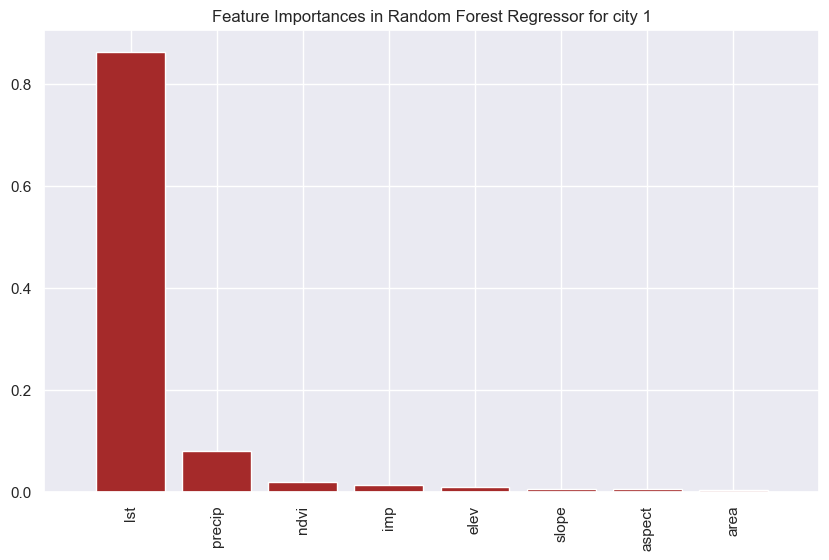

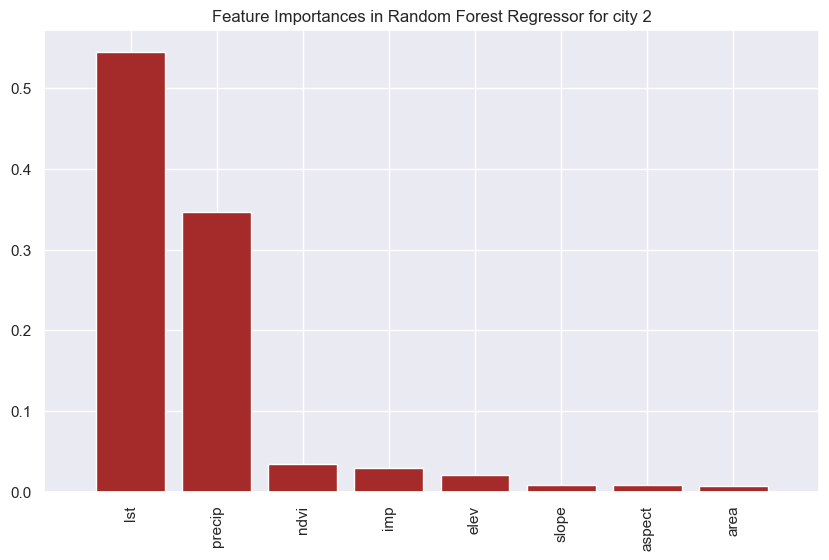

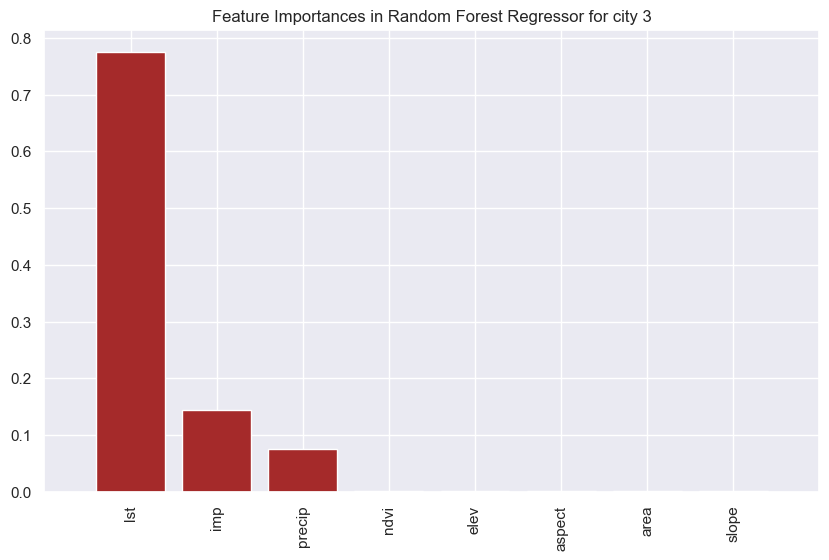

In [152]:
n = 0
for df in cities:
    # Split the data into features (X) and target (y)
    X = df.drop(['uhi', 'year'], axis=1)
    y = df['uhi']
    
    # Fit the model
    rf = RandomForestRegressor()
    rf.fit(X, y)

    # Get the feature importances
    importances = rf.feature_importances_

    # Sort the feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Get the feature names
    feature_names = X.columns

    # Plot the feature importances
    n += 1
    plt.figure(figsize=(10,6))
    plt.title("Feature Importances in Random Forest Regressor for city " + str(n) )
    plt.bar(range(X.shape[1]), importances[indices], color="brown", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])

    #Save the plot
    plt.savefig("Variable importance in RFR for city " + str(n), dpi = 400)
    plt.show()

## 3.4) Print model performances

Model: RandomForestRegressor
MSE: 0.58
RMSE: 0.76
R-squared: 0.96
MAE: 0.49


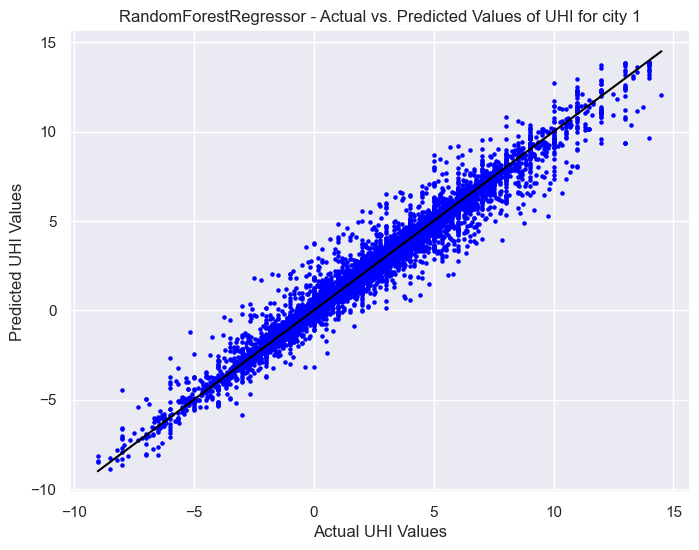

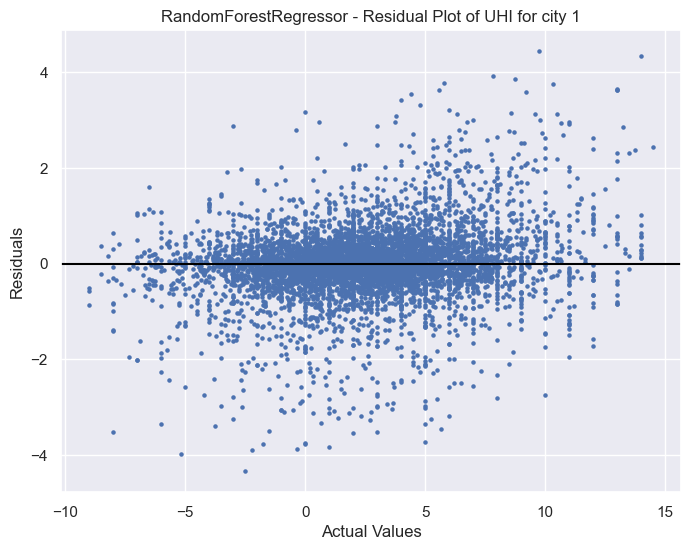

Model: RandomForestRegressor
MSE: 1.28
RMSE: 1.13
R-squared: 0.92
MAE: 0.41


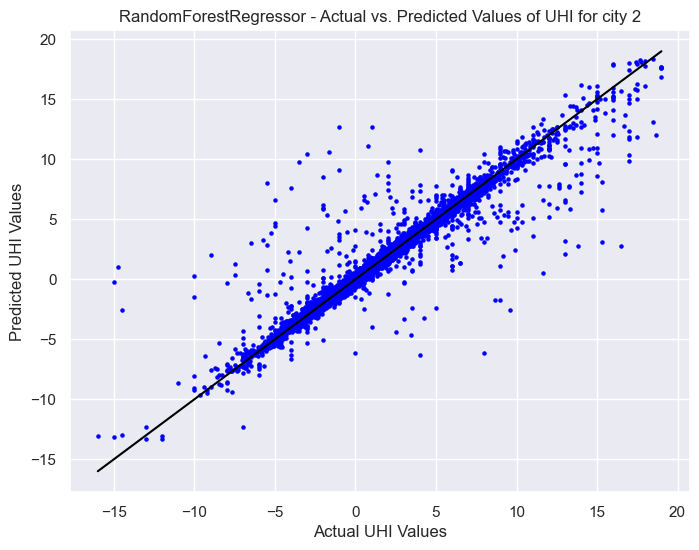

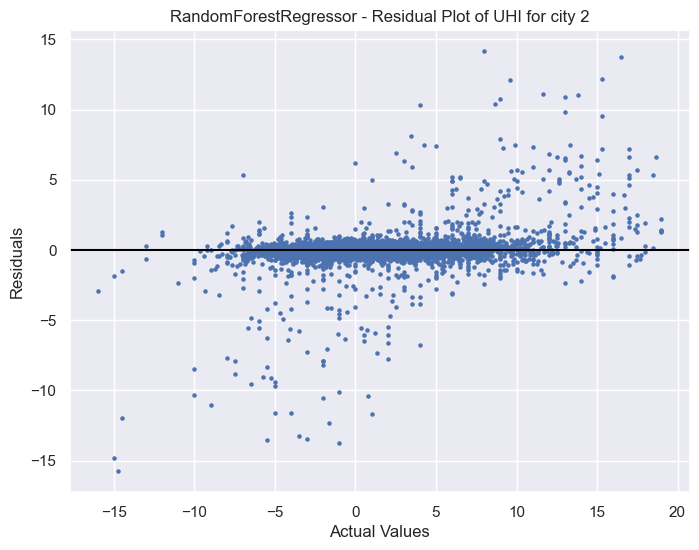

Model: RandomForestRegressor
MSE: 0.23
RMSE: 0.48
R-squared: 0.99
MAE: 0.31


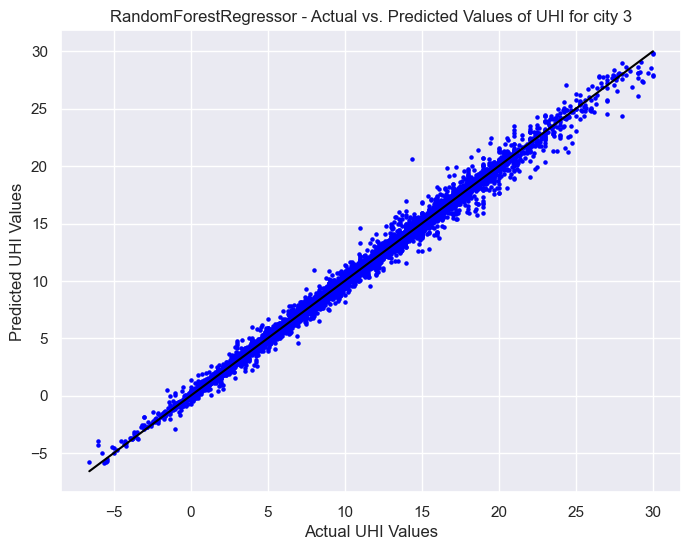

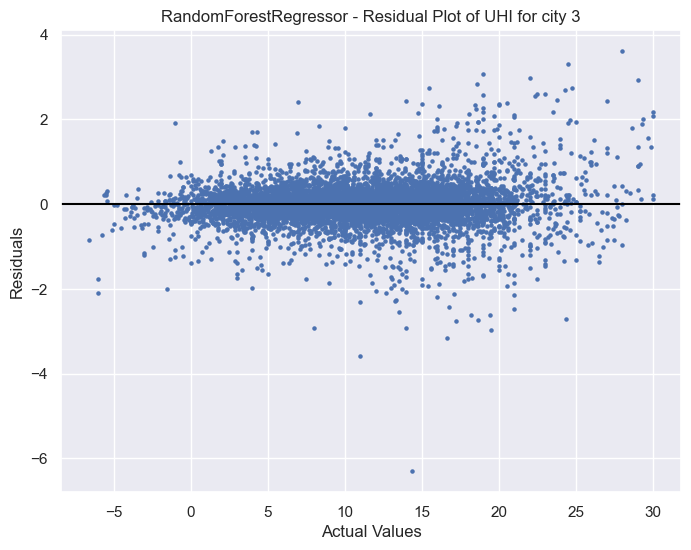

In [154]:
# Make a vaiable with the list of models
rf = RandomForestRegressor()
n = 0

# Loop through each models and plot the prediction, plot the residuals, and print the evaluation metrics.
for df in cities:
    # Split the data into features (X) and target (y)
    X = df.drop(['uhi', 'year'], axis=1)
    y = df['uhi']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {type(rf).__name__}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"MAE: {mae:.2f}")

    # Scatter Plot
    n += 1
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c = 'blue', s = 5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'black')
    plt.xlabel('Actual UHI Values')
    plt.ylabel('Predicted UHI Values')
    plt.title(f"{type(rf).__name__} - Actual vs. Predicted Values of UHI for city "+ str(n))
    plt.savefig(f"{type(rf).__name__}_scatter" + " for city " + str(n), dpi=300)  # Save the scatter plot
    plt.show()

    # Residual Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test - y_pred, s = 5)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f"{type(rf).__name__} - Residual Plot of UHI for city "+ str(n))
    plt.savefig(f"{type(rf).__name__}_residual" + " for city " + str(n), dpi=300)  # Save the residual plot
    plt.show()

# 4) Deep Learning (CNN)

## 4.1) Import the necessary libraries for deep learning

In [92]:
# Import libraries
import tensorflow
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input

## 4.2) Arrange the data for Deep Learning

### See your data

In [95]:
len(dfs2)

3

In [96]:
dfs2[0].head(2)

,area,lst,city,year,imp,uhi,ndvi,elev,slope,aspect,precip,date
0,2.895939e+08,303.399078,Addis Ababa,2000,0,-0.858326,438.182587,2411.539062,5.959319,177.286224,90.544517,1/1/2000 0:00:00
1,6.852724e+05,303.822571,Addis Ababa,2000,1,0.274194,432.177429,2384.403320,6.209677,190.693543,92.880951,1/1/2000 0:00:00


### Delete unimportant columns

In [98]:
#for df in dfs2:
    #df.drop(['OBJECTID','city','year'], axis = 1, inplace = True)

In [99]:
dfs2[0].head(2)

,area,lst,city,year,imp,uhi,ndvi,elev,slope,aspect,precip,date
0,2.895939e+08,303.399078,Addis Ababa,2000,0,-0.858326,438.182587,2411.539062,5.959319,177.286224,90.544517,1/1/2000 0:00:00
1,6.852724e+05,303.822571,Addis Ababa,2000,1,0.274194,432.177429,2384.403320,6.209677,190.693543,92.880951,1/1/2000 0:00:00


### Reorder the data to put UHI at the last column

In [101]:
dfs3 = []
for df in dfs2:
    df3 = df[['area', 'lst', 'imp', 'ndvi', 'elev', 'slope', 'aspect', 'precip', 'date', 'uhi']]
    dfs3.append(df3)
dfs3[0].head(2)

,area,lst,imp,ndvi,elev,slope,aspect,precip,date,uhi
0,2.895939e+08,303.399078,0,438.182587,2411.539062,5.959319,177.286224,90.544517,1/1/2000 0:00:00,-0.858326
1,6.852724e+05,303.822571,1,432.177429,2384.403320,6.209677,190.693543,92.880951,1/1/2000 0:00:00,0.274194


### Ensure the 'date' column is really a date format

In [103]:
# 1) See the data types
dfs3[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32990 entries, 0 to 32989
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    32990 non-null  float64
 1   lst     32990 non-null  float64
 2   imp     32990 non-null  int64  
 3   ndvi    32990 non-null  float64
 4   elev    32990 non-null  float64
 5   slope   32979 non-null  float64
 6   aspect  32979 non-null  float64
 7   precip  32635 non-null  float64
 8   date    32990 non-null  object 
 9   uhi     32990 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.5+ MB


In [104]:
# 2) Convert the 'date' column to datetime format
for df in dfs3:
    df['date'] = pd.to_datetime(df['date'])

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1037897830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1037897830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1037897830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [105]:
# 3) Check if data format for column 'date' has been changed correctly
dfs3[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32990 entries, 0 to 32989
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   area    32990 non-null  float64       
 1   lst     32990 non-null  float64       
 2   imp     32990 non-null  int64         
 3   ndvi    32990 non-null  float64       
 4   elev    32990 non-null  float64       
 5   slope   32979 non-null  float64       
 6   aspect  32979 non-null  float64       
 7   precip  32635 non-null  float64       
 8   date    32990 non-null  datetime64[ns]
 9   uhi     32990 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


### Set the 'date' column as the index

In [107]:
for df in dfs3:
    df.set_index('date', inplace=True)

In [108]:
# Check if 'date' column has been indexed (the second line in the console)
dfs3[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32990 entries, 2000-01-01 to 2025-01-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    32990 non-null  float64
 1   lst     32990 non-null  float64
 2   imp     32990 non-null  int64  
 3   ndvi    32990 non-null  float64
 4   elev    32990 non-null  float64
 5   slope   32979 non-null  float64
 6   aspect  32979 non-null  float64
 7   precip  32635 non-null  float64
 8   uhi     32990 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [109]:
# Load time series data for deep learning
#addis_data = dfs3[0]
#jburg_data = dfs3[1]
#lagos_data = dfs3[2]
#addis_data.head(2)

## 4.3) Make prediction of UHI using Convolutional Neural Networks - CNN method

Do it for each of the three cities using a for loop.

### 4.3.1) Prediction of UHI

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1510 - val_loss: 0.0089
Epoch 2/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0077 - val_loss: 0.0091
Epoch 3/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.0092
Epoch 4/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0091
Epoch 5/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0090
Epoch 6/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0092
Epoch 7/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0092
Epoch 8/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - val_loss: 0.0090
Epoch 9/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0091
Epoch 10/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.0093
Epoch 11/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.0093
Epoch 12/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

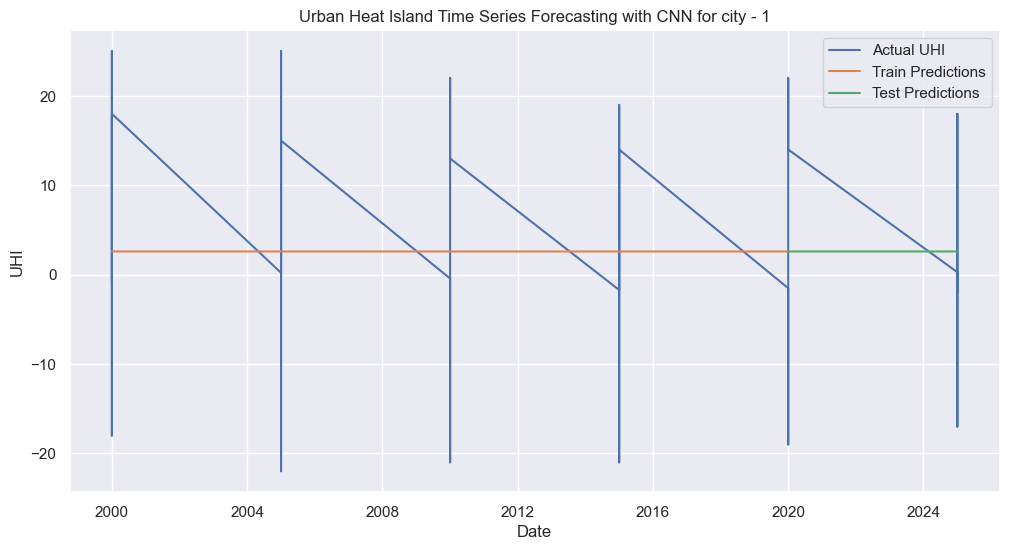

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1893 - val_loss: 0.0055
Epoch 2/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 3/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4427e-04 - val_loss: 0.0025
Epoch 4/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1055e-04 - val_loss: 0.0026
Epoch 5/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6449e-04 - val_loss: 0.0026
Epoch 6/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4431e-04 - val_loss: 0.0025
Epoch 7/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.8270e-04 - val_loss: 0.0026
Epoch 8/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3994e-04 - val_loss: 0.0025
Epoch 9/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6422e-04 - val_loss: 0.0024
Epoch 10/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3417e-04 - val_loss: 0.0027
Epoch 11/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1899e-04 - val_loss: 0

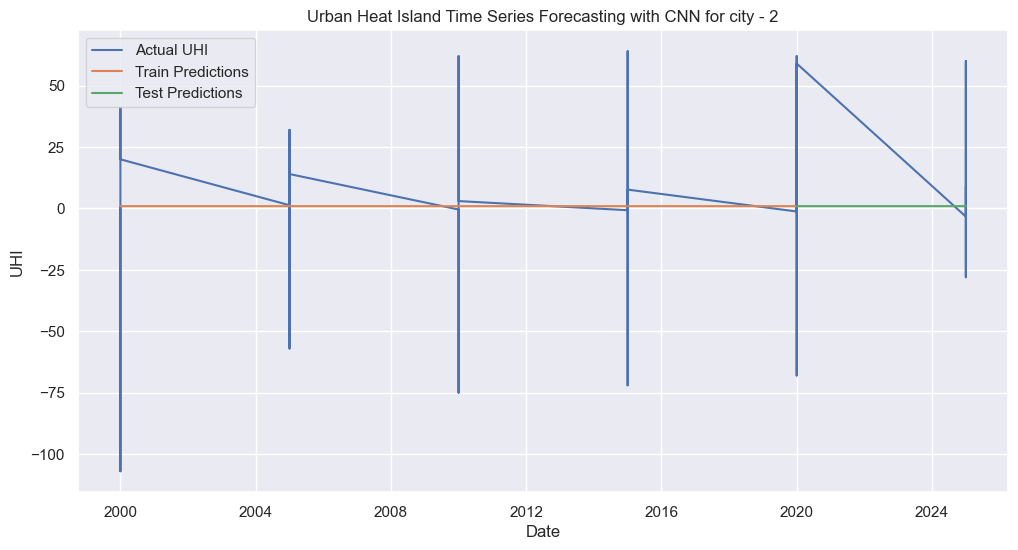

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\2093835969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan - val_loss: nan
Epoch 2/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 4/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 5/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 9/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 10/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 11/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 12/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 13/50
1

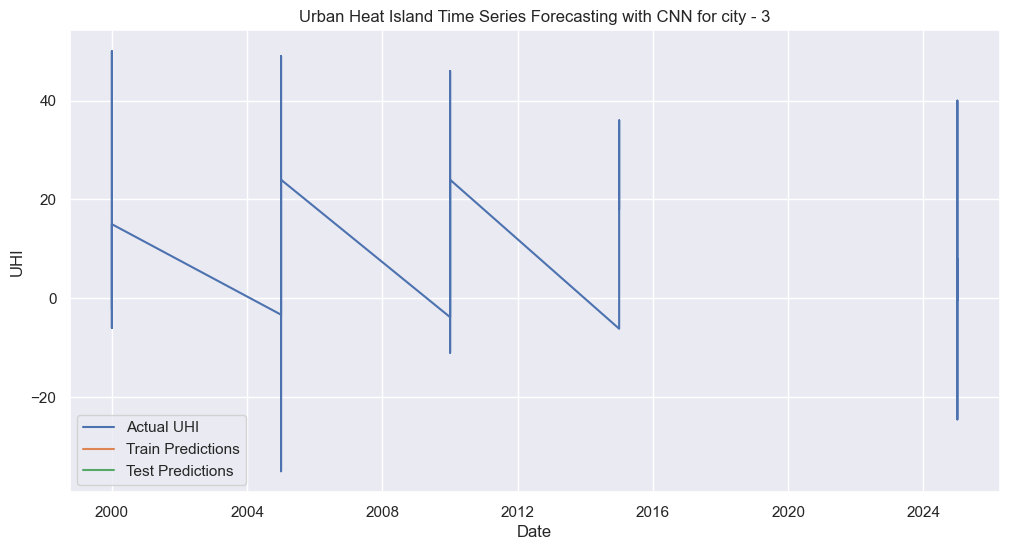

In [113]:
n = 0
for data in dfs3:
    # Prepare the data
    scalers = {}
    for column in data.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        data[column] = scaler.fit_transform(data[[column]])
        scalers[column] = scaler
    
    # Create a function to create sequences
    def create_sequences(data, time_steps=1):
        X, y = [], []
        for i in range(len(data)-time_steps):
            X.append(data.iloc[i:(i+time_steps)].values)
            y.append(data.iloc[i + time_steps]['uhi'])
        return np.array(X), np.array(y)
        
    # Define the time step (window size)
    time_steps = 5
    
    # Create sequences
    X, y = create_sequences(data, time_steps)

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build the CNN model
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train.shape[2])))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
    
    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scalers['uhi'].inverse_transform(train_predict)
    y_train = scalers['uhi'].inverse_transform(y_train.reshape(-1, 1))
    test_predict = scalers['uhi'].inverse_transform(test_predict)
    y_test = scalers['uhi'].inverse_transform(y_test.reshape(-1, 1))

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, scalers['uhi'].inverse_transform(data['uhi'].values.reshape(-1, 1)), label='Actual UHI')
    plt.plot(data.index[time_steps:train_size+time_steps], train_predict, label='Train Predictions')
    plt.plot(data.index[train_size+time_steps:], test_predict, label='Test Predictions')
    plt.xlabel('Date')
    plt.ylabel('UHI')
    n += 1
    plt.title('Urban Heat Island Time Series Forecasting with CNN for city - ' + str(n))
    plt.legend()
       
    #Save the plot
    plt.savefig("Urban Heat Island Time Forecasting Result for" + " city - " + str(n), dpi = 400)
    plt.show()



### 4.3.1) Prediction of LST

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1909 - val_loss: 0.0150
Epoch 2/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0092 - val_loss: 0.0101
Epoch 3/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 4/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0077 - val_loss: 0.0101
Epoch 5/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075 - val_loss: 0.0101
Epoch 6/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075 - val_loss: 0.0101
Epoch 7/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 8/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 9/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 10/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 11/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075 - val_loss: 0.0101
Epoch 12/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

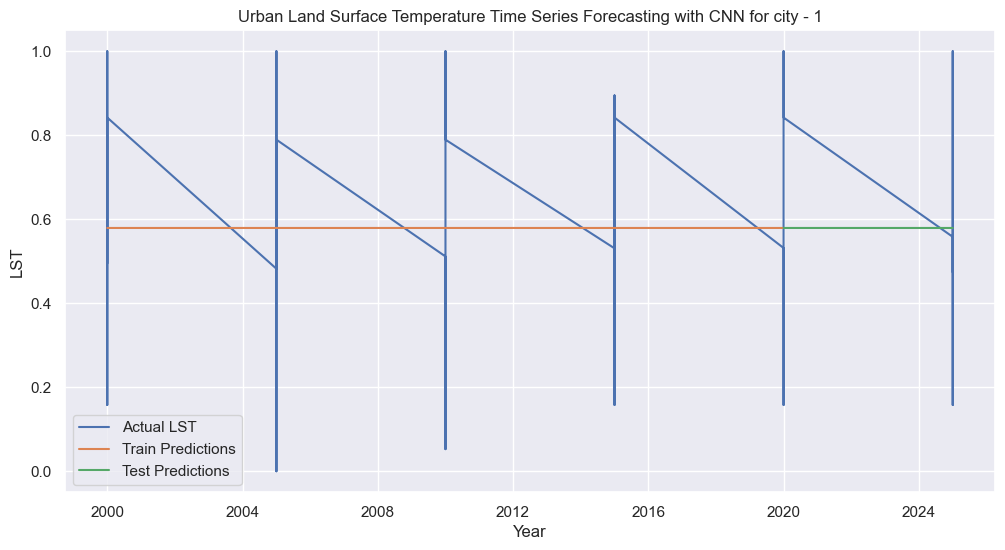

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1855 - val_loss: 0.0054
Epoch 2/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 3/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 4/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 5/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 6/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 7/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 8/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 9/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 11/50
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 12/50
1065/1065 ━━━━━━━━

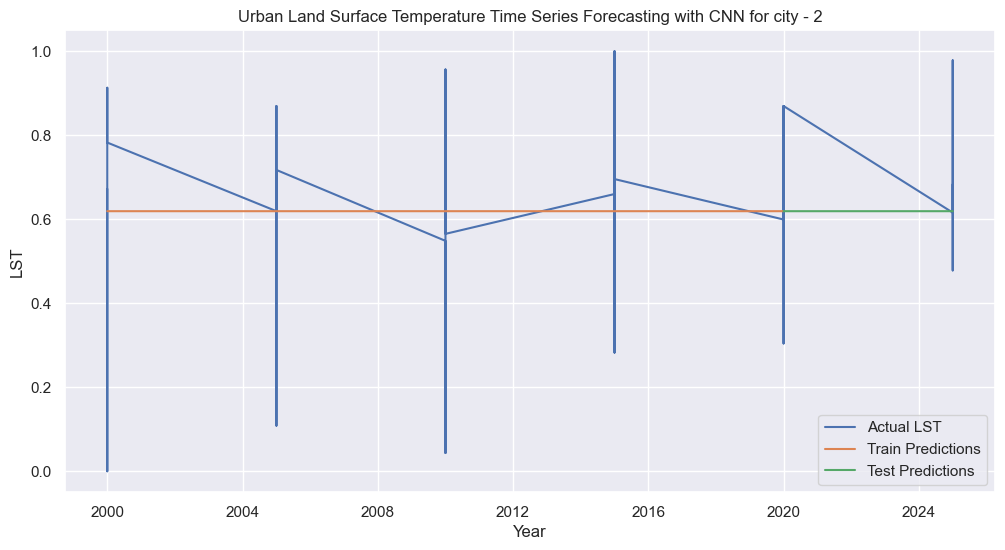

C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[[column]])
C:\Users\tamir\AppData\Local\Temp\ipykernel_6736\1636259740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Epoch 1/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0829 - val_loss: 0.0241
Epoch 2/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035 - val_loss: 0.0236
Epoch 3/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0235
Epoch 4/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0034 - val_loss: 0.0235
Epoch 5/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0238
Epoch 6/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0233
Epoch 7/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0034 - val_loss: 0.0246
Epoch 8/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0034 - val_loss: 0.0237
Epoch 9/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0227
Epoch 10/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - val_loss: 0.0228
Epoch 11/50
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0034 - val_loss: 0.0243
Epoch 12/50
1218/1218 ━━━━━━━━

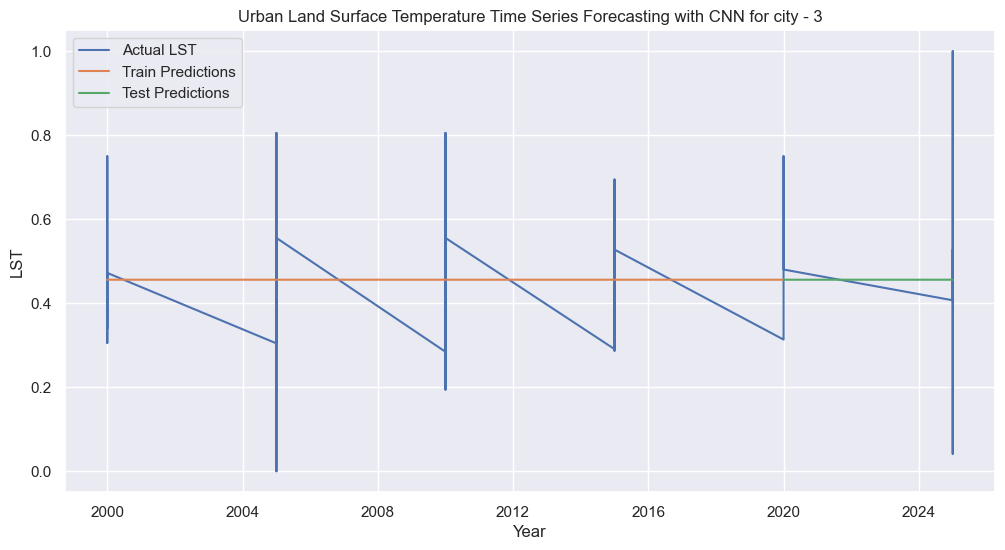

In [115]:
n = 0
for data in dfs3:
    # Prepare the data
    scalers = {}
    for column in data.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        data[column] = scaler.fit_transform(data[[column]])
        scalers[column] = scaler
    
    # Create a function to create sequences
    def create_sequences(data, time_steps=1):
        X, y = [], []
        for i in range(len(data)-time_steps):
            X.append(data.iloc[i:(i+time_steps)].values)
            y.append(data.iloc[i + time_steps]['lst'])
        return np.array(X), np.array(y)
        
    # Define the time step (window size)
    time_steps = 5
    
    # Create sequences
    X, y = create_sequences(data, time_steps)

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build the CNN model
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train.shape[2])))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
    
    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scalers['lst'].inverse_transform(train_predict)
    y_train = scalers['lst'].inverse_transform(y_train.reshape(-1, 1))
    test_predict = scalers['lst'].inverse_transform(test_predict)
    y_test = scalers['lst'].inverse_transform(y_test.reshape(-1, 1))

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, scalers['lst'].inverse_transform(data['lst'].values.reshape(-1, 1)), label='Actual LST')
    plt.plot(data.index[time_steps:train_size+time_steps], train_predict, label='Train Predictions')
    plt.plot(data.index[train_size+time_steps:], test_predict, label='Test Predictions')
    plt.xlabel('Year')
    plt.ylabel('LST')
    n += 1
    plt.title('Urban Land Surface Temperature Time Series Forecasting with CNN for city - ' + str(n))
    plt.legend()
    
    # Save the plot
    plt.savefig("Urban Land Surface Temperature  Time Forecasting Result for" + " city - " + str(n), dpi = 400)
    plt.show()



## 4.4) Make Prediction with CNN Using data from NCEI, for Validation

The result of this activity could be used as a validation because station data are directly being processed

#### Use data from NCEI to make prediction with CNN, this task can be taken as validation

In [119]:
# Import data
addis_ncei = pd.read_csv('Addis_NCEI.csv')
jburg_ncei = pd.read_csv('Jburg_NCEI.csv')
lagoss_ncei = pd.read_csv('Lagos_NCEI.csv')

In [120]:
# Put the data frames in a list
dfs4 = [addis_ncei, jburg_ncei, lagoss_ncei]
for df in dfs4:
    print(df.head(2))

       date  tavg_0F  prcp_In
0  1/1/2000      NaN      NaN
1  1/2/2000      NaN      NaN
       date  tavg_0F  prcp_In
0  1/1/2000     63.0     0.61
1  1/2/2000     65.0     0.02
       date  tavg_0F  prcp_In
0  1/1/2000     82.0      0.0
1  1/2/2000     82.0      0.0


In [121]:
# Impute mean for missing age values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
for df in dfs4:
    df[['tavg_0F']] = imputer.fit_transform(df[['tavg_0F']])
    df[['prcp_In']] = imputer.fit_transform(df[['prcp_In']])
dfs4[0].head(2)

,date,tavg_0F,prcp_In
0,1/1/2000,63.126063,0.220688
1,1/2/2000,63.126063,0.220688


In [122]:
# Convert the 'date' column to datetime format
for df in dfs4:
    df['date'] = pd.to_datetime(df['date'])

In [123]:
# Set the 'date' column as the index
for df in dfs4:
    df.set_index('date', inplace=True)

In [124]:
for df in dfs4:
    print(df.head(2))

              tavg_0F   prcp_In
date                           
2000-01-01  63.126063  0.220688
2000-01-02  63.126063  0.220688
            tavg_0F  prcp_In
date                        
2000-01-01     63.0     0.61
2000-01-02     65.0     0.02
            tavg_0F  prcp_In
date                        
2000-01-01     82.0      0.0
2000-01-02     82.0      0.0


In [125]:
# Predict rain temperature using CNN with NCEI data

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0309 - val_loss: 0.0062
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 10/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 11/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 12/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

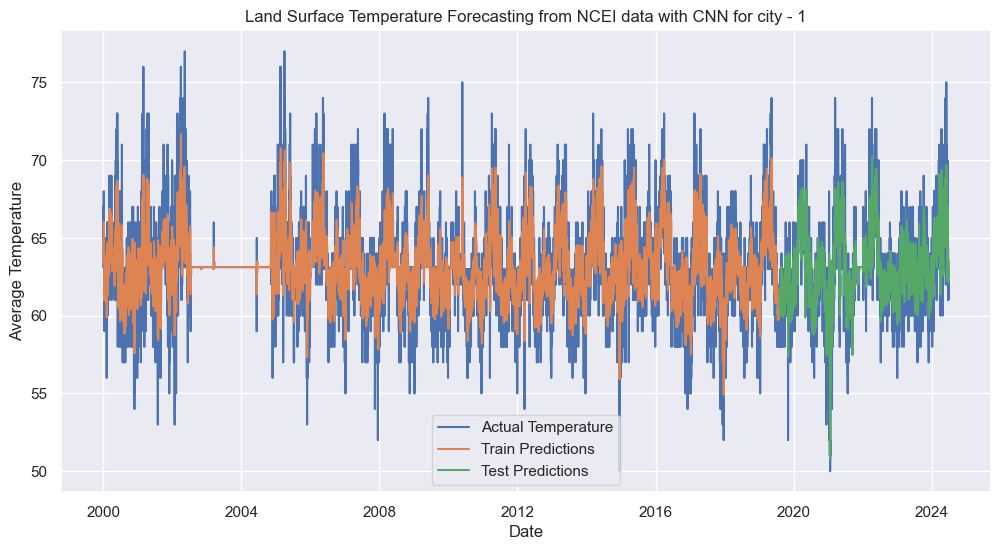

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0282 - val_loss: 0.0051
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 10/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 11/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 12/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

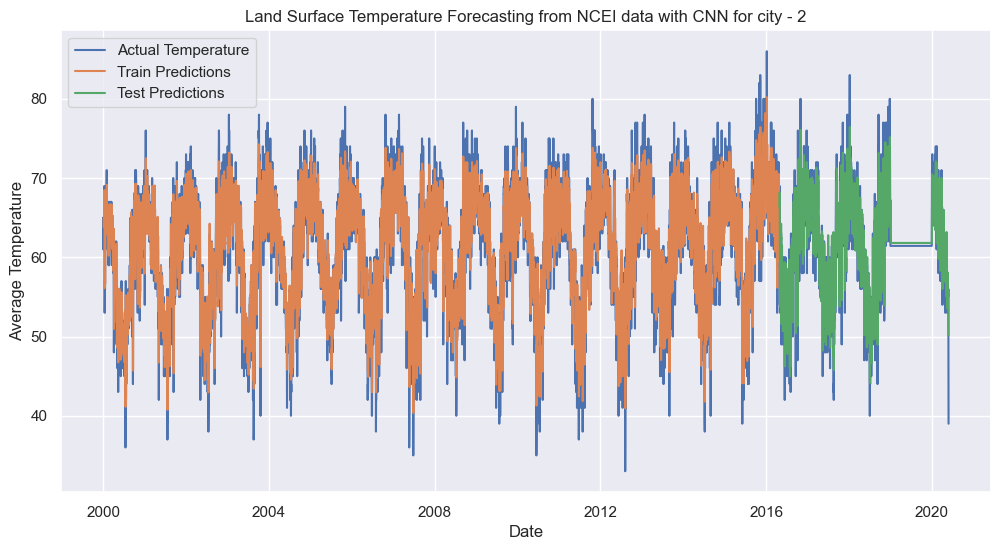

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0356 - val_loss: 0.0080
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0071
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 9/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 10/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 11/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 12/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

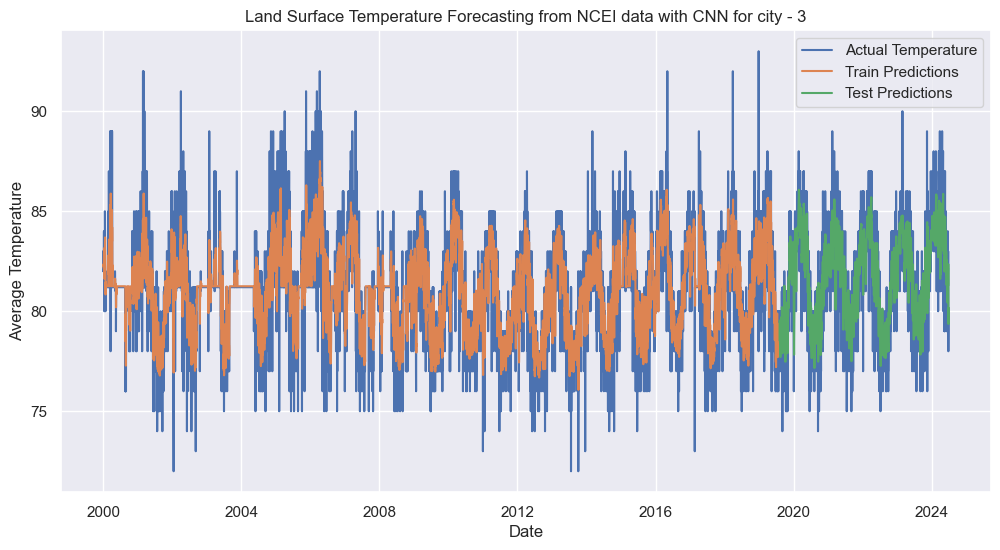

In [126]:
n = 0
for df in dfs4:
    # Prepare the data
    scalers = {}
    for column in df.columns:
        scaler = MinMaxScaler(feature_range=(0, 1))
        df[column] = scaler.fit_transform(df[[column]])
        scalers[column] = scaler
    
    # Create a function to create sequences
    def create_sequences(df, time_steps=1):
        X, y = [], []
        for i in range(len(df)-time_steps):
            X.append(df.iloc[i:(i+time_steps)].values)
            y.append(df.iloc[i + time_steps]['tavg_0F'])
        return np.array(X), np.array(y)
        
    # Define the time step (window size)
    time_steps = 5
    
    # Create sequences
    X, y = create_sequences(df, time_steps)

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build the CNN model
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train.shape[2])))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)
    
    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scalers['tavg_0F'].inverse_transform(train_predict)
    y_train = scalers['tavg_0F'].inverse_transform(y_train.reshape(-1, 1))
    test_predict = scalers['tavg_0F'].inverse_transform(test_predict)
    y_test = scalers['tavg_0F'].inverse_transform(y_test.reshape(-1, 1))

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, scalers['tavg_0F'].inverse_transform(df['tavg_0F'].values.reshape(-1, 1)), label='Actual Temperature')
    plt.plot(df.index[time_steps:train_size+time_steps], train_predict, label='Train Predictions')
    plt.plot(df.index[train_size+time_steps:], test_predict, label='Test Predictions')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    n += 1
    plt.title('Land Surface Temperature Forecasting from NCEI data with CNN for city - ' + str(n))
    plt.legend()
    # Save the plot
    plt.savefig("Land Surface Temperature Forecasting from NCEI data Result for" + " city - " + str(n), dpi = 400)
    plt.show()

